In [ ]:
# import libraries and dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_string_dtype, is_numeric_dtype

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
warnings.filterwarnings("ignore")
df = pd.read_csv("Train_Test_IoT_GPS_Tracker.csv")
df.head()

,ts,date,time,latitude,longitude,label,type
0,1556242299,25-Apr-19,18:31:39,116.521704,132.162504,1,ddos
1,1556242301,25-Apr-19,18:31:41,121.742933,135.072500,1,ddos
2,1556242306,25-Apr-19,18:31:46,121.795929,135.110198,1,ddos
3,1556242309,25-Apr-19,18:31:49,116.611216,132.224555,1,ddos
4,1556242311,25-Apr-19,18:31:51,121.841526,135.151362,1,ddos


In [ ]:
# calculate duplicates 
dups = df.duplicated() 
# report if there are any duplicates 
print(dups.any()) 
# list all duplicate rows 
print(df[dups])
print(df.shape) 
# delete duplicate rows 
df.drop_duplicates(inplace=True) 
print(df.shape)


False
Empty DataFrame
Columns: [ts, date, time, latitude, longitude, label, type]
Index: []
(58960, 7)
(58960, 7)


In [ ]:
# address missing value
df.isnull().sum()
missing_count = df.isnull().sum() # the count of missing values
value_count = df.isnull().count() # the count of all values
missing_percentage = round(missing_count / value_count * 100, 1) #the percentage of missing values
missing_df = pd.DataFrame({'count': missing_count, 'percentage': missing_percentage}) #create a dataframe
print(missing_df)

           count  percentage
ts             0         0.0
date           0         0.0
time           0         0.0
latitude       0         0.0
longitude      0         0.0
label          0         0.0
type           0         0.0


In [ ]:
df

,ts,date,time,latitude,longitude,label,type
0,1556242299,25-Apr-19,18:31:39,116.521704,132.162504,1,ddos
1,1556242301,25-Apr-19,18:31:41,121.742933,135.072500,1,ddos
2,1556242306,25-Apr-19,18:31:46,121.795929,135.110198,1,ddos
3,1556242309,25-Apr-19,18:31:49,116.611216,132.224555,1,ddos
4,1556242311,25-Apr-19,18:31:51,121.841526,135.151362,1,ddos
...,...,...,...,...,...,...,...
58955,1554202928,2-Apr-19,4:02:08,1.028628,10.810522,0,normal
58956,1554202928,2-Apr-19,4:02:08,0.345361,10.727989,0,normal
58957,1554202928,2-Apr-19,4:02:08,0.423384,10.508036,0,normal
58958,1554202928,2-Apr-19,4:02:08,0.445292,10.381356,0,normal


In [ ]:
# calculate duplicates 
dups = df.duplicated() 
# report if there are any duplicates 
print(dups.any()) 
# list all duplicate rows 
print(df[dups])
print(df.shape) 
# delete duplicate rows 
df.drop_duplicates(inplace=True) 
print(df.shape)


False
Empty DataFrame
Columns: [ts, date, time, latitude, longitude, label, type]
Index: []
(58960, 7)
(58960, 7)


In [ ]:
type('date')

str

In [ ]:
type('time')

str

In [ ]:
df['date'] = pd.to_datetime(df['date'])
print(df)

               ts       date        time    latitude   longitude  label  \
0      1556242299 2019-04-25   18:31:39   116.521704  132.162504      1   
1      1556242301 2019-04-25   18:31:41   121.742933  135.072500      1   
2      1556242306 2019-04-25   18:31:46   121.795929  135.110198      1   
3      1556242309 2019-04-25   18:31:49   116.611216  132.224555      1   
4      1556242311 2019-04-25   18:31:51   121.841526  135.151362      1   
...           ...        ...         ...         ...         ...    ...   
58955  1554202928 2019-04-02     4:02:08    1.028628   10.810522      0   
58956  1554202928 2019-04-02     4:02:08    0.345361   10.727989      0   
58957  1554202928 2019-04-02     4:02:08    0.423384   10.508036      0   
58958  1554202928 2019-04-02     4:02:08    0.445292   10.381356      0   
58959  1554202928 2019-04-02     4:02:08    0.532691   10.345983      0   

         type  
0        ddos  
1        ddos  
2        ddos  
3        ddos  
4        ddos  
...

In [ ]:
#Transform string to date
df['date'] = pd.to_datetime(df.date, format="%d-%m-%Y")

In [ ]:
#Extracting Year
df['year'] = df['date'].dt.year

#Extracting Month
df['month'] = df['date'].dt.month

#Extracting the weekday name of the date
df['day_name'] = df['date'].dt.day_name()

In [ ]:
# dealing with attribute time
#new data frame with split value columns
new = df['time'].str.split(':',n=2,expand=True)

In [ ]:
# making separate first name column from new data frame
df["hour"]= new[0]
df["min"]= new[1]
df["sec"]= new[2]

In [ ]:
df['month'] = df['month'].astype(int)

In [ ]:
df['hour'] = df['hour'].astype(int)

In [ ]:
df.month.unique()


array([4, 3])

In [ ]:
df.hour.unique()

array([18, 19,  8,  9, 10, 11, 12, 20, 21,  6,  7, 14, 15, 16, 13,  3,  4,
        5, 22, 23, 17])

In [ ]:
import numpy as np
df['hour_sin'] = np.sin((df.hour-1)*(2.*np.pi/24))
df['hour_cos'] = np.cos((df.hour-1)*(2.*np.pi/24))

df['month_sin'] = np.sin((df.month-1)*(2.*np.pi/12))
df['month_cos'] = np.cos((df.month-1)*(2.*np.pi/12))

In [ ]:
# identify all ransomware

# df.type.replace(['normal','ddos','xss','backdoor','injection','password','ransomware','scanning' ], [0, 1, 2, 3, 4, 5, 6, 7], inplace=True)

In [ ]:
df

,ts,date,time,latitude,longitude,label,type,year,month,day_name,hour,min,sec,hour_sin,hour_cos,month_sin,month_cos
0,1556242299,2019-04-25,18:31:39,116.521704,132.162504,1,ddos,2019,4,Thursday,18,31,39,-0.965926,-0.258819,1.0,6.123234e-17
1,1556242301,2019-04-25,18:31:41,121.742933,135.072500,1,ddos,2019,4,Thursday,18,31,41,-0.965926,-0.258819,1.0,6.123234e-17
2,1556242306,2019-04-25,18:31:46,121.795929,135.110198,1,ddos,2019,4,Thursday,18,31,46,-0.965926,-0.258819,1.0,6.123234e-17
3,1556242309,2019-04-25,18:31:49,116.611216,132.224555,1,ddos,2019,4,Thursday,18,31,49,-0.965926,-0.258819,1.0,6.123234e-17
4,1556242311,2019-04-25,18:31:51,121.841526,135.151362,1,ddos,2019,4,Thursday,18,31,51,-0.965926,-0.258819,1.0,6.123234e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58955,1554202928,2019-04-02,4:02:08,1.028628,10.810522,0,normal,2019,4,Tuesday,4,02,08,0.707107,0.707107,1.0,6.123234e-17
58956,1554202928,2019-04-02,4:02:08,0.345361,10.727989,0,normal,2019,4,Tuesday,4,02,08,0.707107,0.707107,1.0,6.123234e-17
58957,1554202928,2019-04-02,4:02:08,0.423384,10.508036,0,normal,2019,4,Tuesday,4,02,08,0.707107,0.707107,1.0,6.123234e-17
58958,1554202928,2019-04-02,4:02:08,0.445292,10.381356,0,normal,2019,4,Tuesday,4,02,08,0.707107,0.707107,1.0,6.123234e-17


In [ ]:
# address missing value
df.isnull().sum()
missing_count = df.isnull().sum() # the count of missing values
value_count = df.isnull().count() # the count of all values
missing_percentage = round(missing_count / value_count * 100, 1) #the percentage of missing values
missing_df = pd.DataFrame({'count': missing_count, 'percentage': missing_percentage}) #create a dataframe
print(missing_df)

           count  percentage
ts             0         0.0
date           0         0.0
time           0         0.0
latitude       0         0.0
longitude      0         0.0
label          0         0.0
type           0         0.0
year           0         0.0
month          0         0.0
day_name       0         0.0
hour           0         0.0
min            0         0.0
sec            0         0.0
hour_sin       0         0.0
hour_cos       0         0.0
month_sin      0         0.0
month_cos      0         0.0


In [ ]:
# drop columns 
df = df.drop(['ts', 'time','label','date','min','sec'], axis=1)

In [ ]:
df

,latitude,longitude,type,year,month,day_name,hour,hour_sin,hour_cos,month_sin,month_cos
0,116.521704,132.162504,ddos,2019,4,Thursday,18,-0.965926,-0.258819,1.0,6.123234e-17
1,121.742933,135.072500,ddos,2019,4,Thursday,18,-0.965926,-0.258819,1.0,6.123234e-17
2,121.795929,135.110198,ddos,2019,4,Thursday,18,-0.965926,-0.258819,1.0,6.123234e-17
3,116.611216,132.224555,ddos,2019,4,Thursday,18,-0.965926,-0.258819,1.0,6.123234e-17
4,121.841526,135.151362,ddos,2019,4,Thursday,18,-0.965926,-0.258819,1.0,6.123234e-17
...,...,...,...,...,...,...,...,...,...,...,...
58955,1.028628,10.810522,normal,2019,4,Tuesday,4,0.707107,0.707107,1.0,6.123234e-17
58956,0.345361,10.727989,normal,2019,4,Tuesday,4,0.707107,0.707107,1.0,6.123234e-17
58957,0.423384,10.508036,normal,2019,4,Tuesday,4,0.707107,0.707107,1.0,6.123234e-17
58958,0.445292,10.381356,normal,2019,4,Tuesday,4,0.707107,0.707107,1.0,6.123234e-17


In [ ]:
# transform hour to int
#f['hour'] = df['hour'].astype(int)

In [ ]:
#type('hour')

In [ ]:
# transform int to string
df['type'] = df['type'].astype(str)

In [ ]:
# populate the numerical and categorical variables
num_list = []
cat_list = []
for column in df:
   if column != 'type': # separate lable
       if is_numeric_dtype(df[column]):
           num_list.append(column)
       elif is_string_dtype(df[column]):
           cat_list.append(column)

In [ ]:
num_list


['latitude',
 'longitude',
 'year',
 'month',
 'hour',
 'hour_sin',
 'hour_cos',
 'month_sin',
 'month_cos']

In [ ]:
cat_list

['day_name']

In [ ]:
### 2. Feature Engineering and EDA  ###

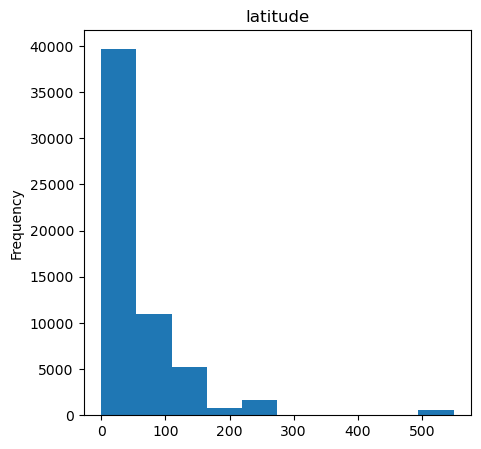

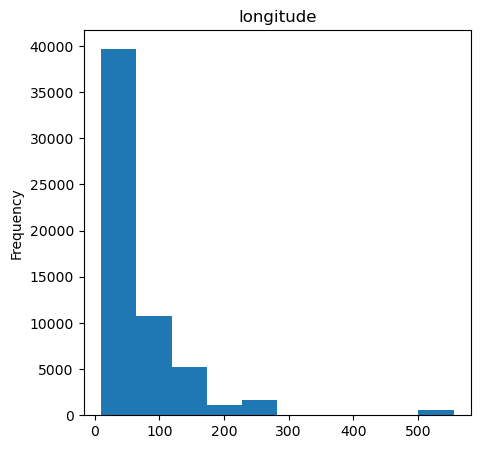

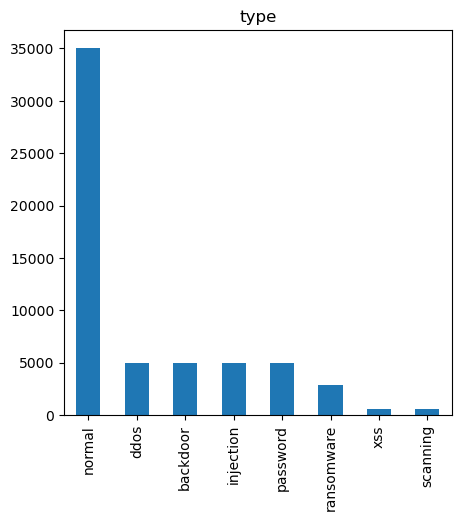

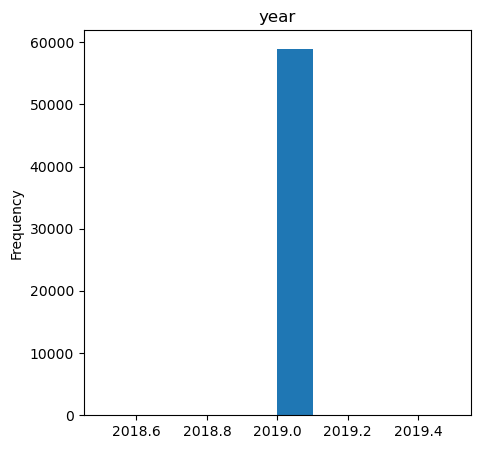

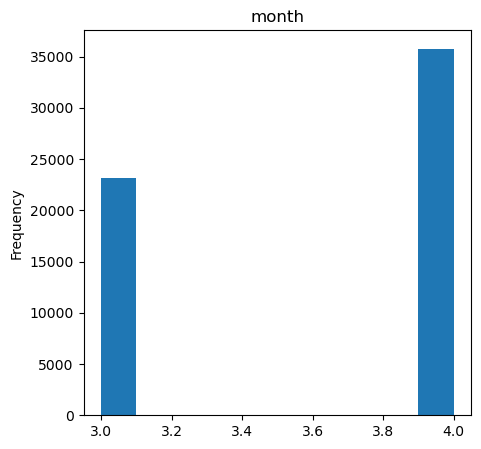

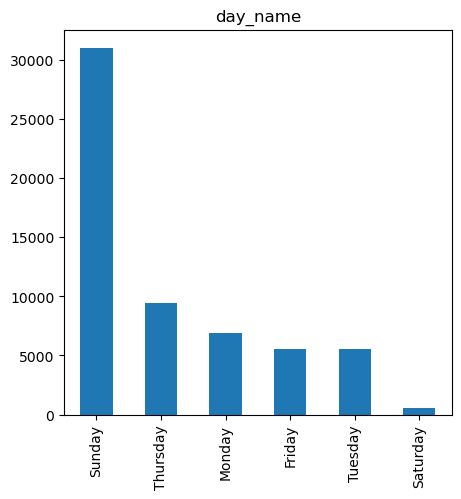

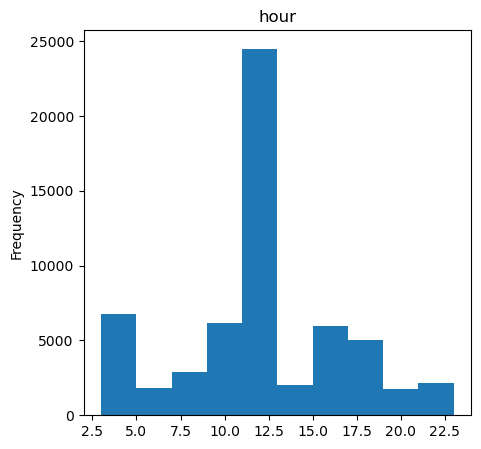

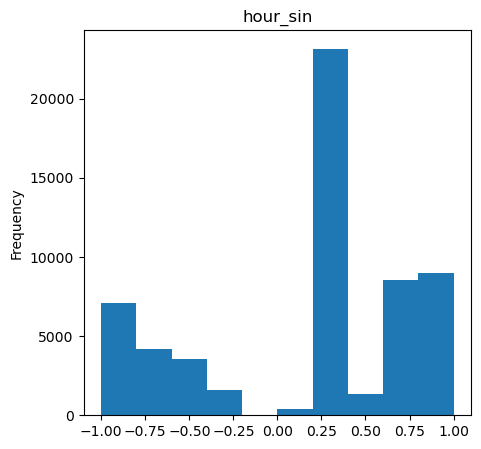

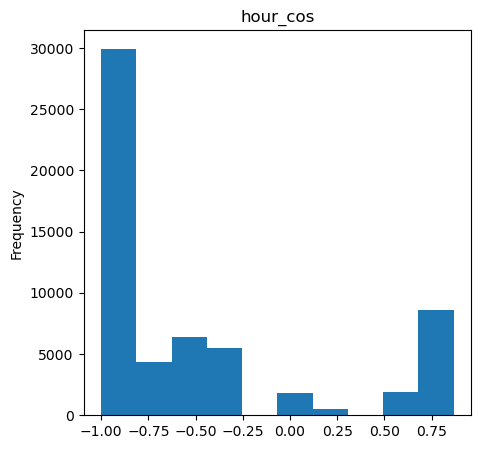

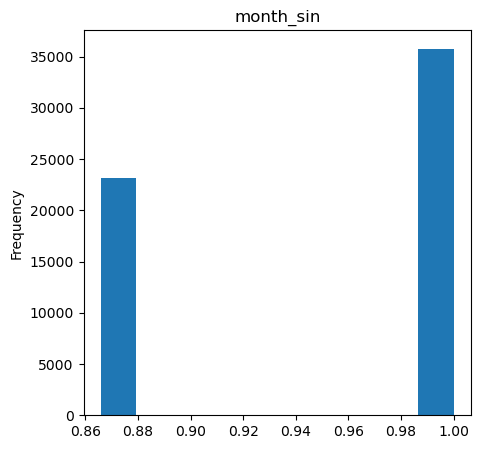

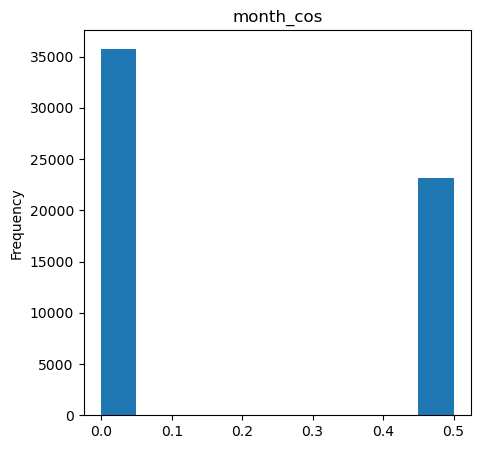

In [ ]:
# univariate analysis
for column in df:
   plt.figure(column, figsize = (5,5))
   plt.title(column)
   if is_numeric_dtype(df[column]):
       df[column].plot(kind = 'hist')
   elif is_string_dtype(df[column]):
       df[column].value_counts()[:10].plot(kind = 'bar')


In [ ]:
df

,latitude,longitude,type,year,month,day_name,hour,hour_sin,hour_cos,month_sin,month_cos
0,116.521704,132.162504,ddos,2019,4,Thursday,18,-0.965926,-0.258819,1.0,6.123234e-17
1,121.742933,135.072500,ddos,2019,4,Thursday,18,-0.965926,-0.258819,1.0,6.123234e-17
2,121.795929,135.110198,ddos,2019,4,Thursday,18,-0.965926,-0.258819,1.0,6.123234e-17
3,116.611216,132.224555,ddos,2019,4,Thursday,18,-0.965926,-0.258819,1.0,6.123234e-17
4,121.841526,135.151362,ddos,2019,4,Thursday,18,-0.965926,-0.258819,1.0,6.123234e-17
...,...,...,...,...,...,...,...,...,...,...,...
58955,1.028628,10.810522,normal,2019,4,Tuesday,4,0.707107,0.707107,1.0,6.123234e-17
58956,0.345361,10.727989,normal,2019,4,Tuesday,4,0.707107,0.707107,1.0,6.123234e-17
58957,0.423384,10.508036,normal,2019,4,Tuesday,4,0.707107,0.707107,1.0,6.123234e-17
58958,0.445292,10.381356,normal,2019,4,Tuesday,4,0.707107,0.707107,1.0,6.123234e-17


In [ ]:
df['type'].value_counts()

normal        35000
ddos           5000
backdoor       5000
injection      5000
password       5000
ransomware     2833
xss             577
scanning        550
Name: type, dtype: int64

In [ ]:
# encoding categorical data using dummies
#from sklearn.preprocessing import LabelEncoder
#categorical_features = ['type']
#for i in categorical_features:
 #  df[i] = LabelEncoder().fit_transform(df[i])

In [ ]:
df['type'].value_counts()

normal        35000
ddos           5000
backdoor       5000
injection      5000
password       5000
ransomware     2833
xss             577
scanning        550
Name: type, dtype: int64

In [ ]:
import category_encoders as ce
encoder= ce.BinaryEncoder(cols=['day_name'],return_df=True)

In [ ]:
df=encoder.fit_transform(df)

In [ ]:
list(df.columns)

['latitude',
 'longitude',
 'type',
 'year',
 'month',
 'day_name_0',
 'day_name_1',
 'day_name_2',
 'hour',
 'hour_sin',
 'hour_cos',
 'month_sin',
 'month_cos']

In [ ]:
df

,latitude,longitude,type,year,month,day_name_0,day_name_1,day_name_2,hour,hour_sin,hour_cos,month_sin,month_cos
0,116.521704,132.162504,ddos,2019,4,0,0,1,18,-0.965926,-0.258819,1.0,6.123234e-17
1,121.742933,135.072500,ddos,2019,4,0,0,1,18,-0.965926,-0.258819,1.0,6.123234e-17
2,121.795929,135.110198,ddos,2019,4,0,0,1,18,-0.965926,-0.258819,1.0,6.123234e-17
3,116.611216,132.224555,ddos,2019,4,0,0,1,18,-0.965926,-0.258819,1.0,6.123234e-17
4,121.841526,135.151362,ddos,2019,4,0,0,1,18,-0.965926,-0.258819,1.0,6.123234e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58955,1.028628,10.810522,normal,2019,4,1,0,1,4,0.707107,0.707107,1.0,6.123234e-17
58956,0.345361,10.727989,normal,2019,4,1,0,1,4,0.707107,0.707107,1.0,6.123234e-17
58957,0.423384,10.508036,normal,2019,4,1,0,1,4,0.707107,0.707107,1.0,6.123234e-17
58958,0.445292,10.381356,normal,2019,4,1,0,1,4,0.707107,0.707107,1.0,6.123234e-17


<AxesSubplot:>

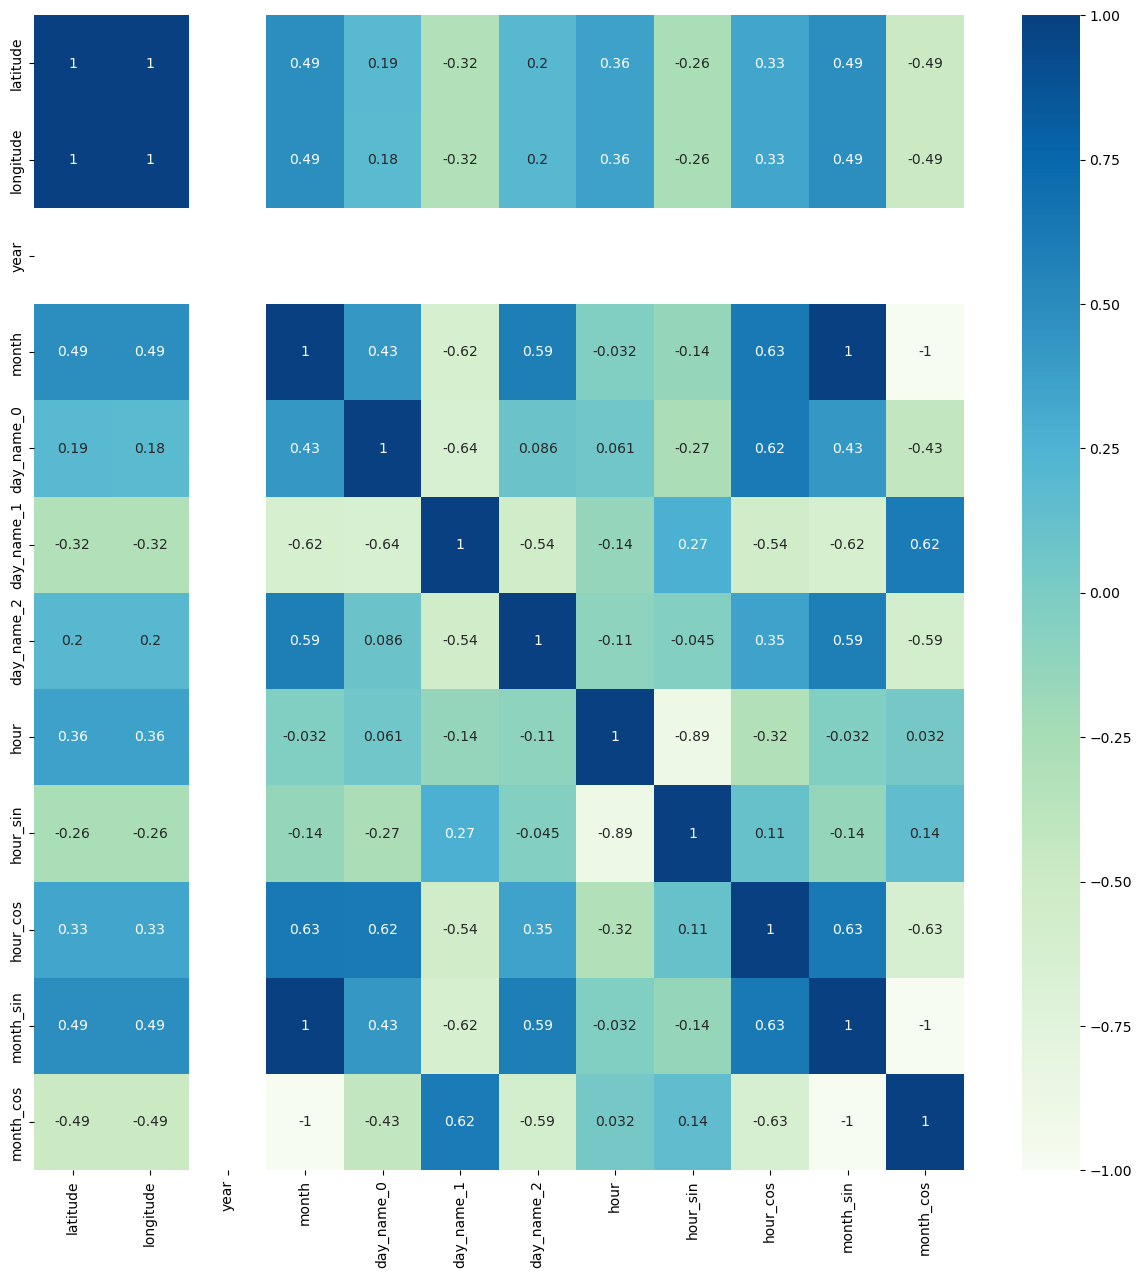

In [ ]:
# multivariate analysis
plt.figure(1, figsize = (15,15))
correlation = df.corr()
sns.heatmap(correlation, cmap = "GnBu", annot = True)


In [ ]:
# select and rearrange columns
df = df[['month_sin','month_cos','hour_cos','hour_sin','latitude','longitude','day_name_0',
 'day_name_1',
 'day_name_2','type']]

In [ ]:
df.columns

Index(['month_sin', 'month_cos', 'hour_cos', 'hour_sin', 'latitude',
       'longitude', 'day_name_0', 'day_name_1', 'day_name_2', 'type'],
      dtype='object')

In [ ]:
x = df.iloc[:,:-1]
y = df["type"]

In [ ]:
x.head()

,month_sin,month_cos,hour_cos,hour_sin,latitude,longitude,day_name_0,day_name_1,day_name_2
0,1.0,6.123234e-17,-0.258819,-0.965926,116.521704,132.162504,0,0,1
1,1.0,6.123234e-17,-0.258819,-0.965926,121.742933,135.072500,0,0,1
2,1.0,6.123234e-17,-0.258819,-0.965926,121.795929,135.110198,0,0,1
3,1.0,6.123234e-17,-0.258819,-0.965926,116.611216,132.224555,0,0,1
4,1.0,6.123234e-17,-0.258819,-0.965926,121.841526,135.151362,0,0,1


In [ ]:
y.head()

0    ddos
1    ddos
2    ddos
3    ddos
4    ddos
Name: type, dtype: object

In [ ]:
df

,month_sin,month_cos,hour_cos,hour_sin,latitude,longitude,day_name_0,day_name_1,day_name_2,type
0,1.0,6.123234e-17,-0.258819,-0.965926,116.521704,132.162504,0,0,1,ddos
1,1.0,6.123234e-17,-0.258819,-0.965926,121.742933,135.072500,0,0,1,ddos
2,1.0,6.123234e-17,-0.258819,-0.965926,121.795929,135.110198,0,0,1,ddos
3,1.0,6.123234e-17,-0.258819,-0.965926,116.611216,132.224555,0,0,1,ddos
4,1.0,6.123234e-17,-0.258819,-0.965926,121.841526,135.151362,0,0,1,ddos
...,...,...,...,...,...,...,...,...,...,...
58955,1.0,6.123234e-17,0.707107,0.707107,1.028628,10.810522,1,0,1,normal
58956,1.0,6.123234e-17,0.707107,0.707107,0.345361,10.727989,1,0,1,normal
58957,1.0,6.123234e-17,0.707107,0.707107,0.423384,10.508036,1,0,1,normal
58958,1.0,6.123234e-17,0.707107,0.707107,0.445292,10.381356,1,0,1,normal


In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import StratifiedKFold

X = df.iloc[:,:-1]
y = df["type"]
#skf = StratifiedKFold(n_splits=10)
#lasso = LassoCV(cv=skf, random_state=42).fit(X, y)
#print('Selected Features:', list(df.columns[np.where(lasso.coef_!=0)[0]]))


In [ ]:
#cross_val = StratifiedKFold(n_splits=5)
#index_iterator = cross_val.split(X_train, y_train)
#clf = RandomForestClassifier()
#clf_random = RandomizedSearchCV(estimator = clf, param_distributions = params, n_iter =100, cv = cross_val,
                            #verbose=2, random_state=42, n_jobs = -1,scoring='roc_auc')
#clf_random.fit(X, y)

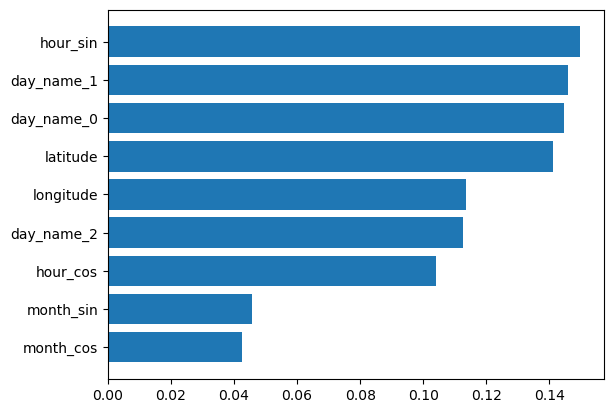

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt

X = df.iloc[:,:-1]
y = df["type"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
rf = RandomForestClassifier(n_estimators = 100, criterion='gini', random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_

indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
from sklearn import datasets


sfm = SelectFromModel(rf, threshold=0.05)
sfm.fit(X_train, y_train)
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)
rf = RandomForestClassifier(n_estimators = 100, criterion='gini', random_state=42)
rf.fit(X_important_train, y_train)
y_pred = rf.predict(X_important_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    backdoor       1.00      1.00      1.00      1500
        ddos       1.00      1.00      1.00      1500
   injection       1.00      1.00      1.00      1500
      normal       1.00      1.00      1.00     10500
    password       1.00      1.00      1.00      1500
  ransomware       1.00      1.00      1.00       850
    scanning       1.00      1.00      1.00       165
         xss       1.00      1.00      1.00       173

    accuracy                           1.00     17688
   macro avg       1.00      1.00      1.00     17688
weighted avg       1.00      1.00      1.00     17688

